In [2]:
import sys, os
import numpy as np
import time, h5py
codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import default_paths, nsd_utils, coco_utils
from model_fitting import initialize_fitting 
import argparse
import pandas as pd
import matplotlib

Initializing coco api...
loading annotations into memory...
Done (t=0.72s)
creating index...
index created!
loading annotations into memory...
Done (t=16.28s)
creating index...
index created!
Initializing coco api...
loading annotations into memory...
Done (t=0.61s)
creating index...
index created!
loading annotations into memory...
Done (t=15.98s)
creating index...
index created!


In [3]:
subject=1
which_prf_grid=5;
prf_model_index=600;


number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]


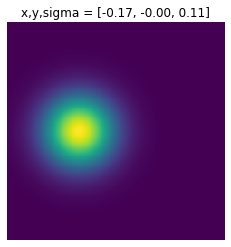

In [4]:
import matplotlib.pyplot as plt
from utils import prf_utils
which_prf_grid=5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)
n_prfs = len(models)
mm = prf_model_index

x,y,sigma = models[mm,:]
n_pix = 240
prf_2d = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix)

plt.figure();
plt.pcolormesh(prf_2d)
plt.axis('off')
plt.axis('square')
plt.gca().invert_yaxis()
plt.title('x,y,sigma = [%.2f, %.2f, %.2f]'%(x,y,sigma));

In [5]:
ims2use = np.arange(0,10000)
image_data = nsd_utils.get_image_data(subject)
image_data = nsd_utils.image_uncolorize_fn(image_data)
image_data = image_data[ims2use,:,:,:]
n_images = image_data.shape[0]


Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255


In [6]:
labels_folder = os.path.join(default_paths.stim_labels_root, 'S%d_within_prf_grid%d'%(subject, \
                                                                                        which_prf_grid))

fn2load = os.path.join(labels_folder, 'S%d_natural_humanmade_prf%d.csv'%(subject, prf_model_index))
nat_hum_df = pd.read_csv(fn2load, index_col=0)
nat_hum = np.array(nat_hum_df)

fn2load = os.path.join(labels_folder, 'S%d_cocolabs_binary_prf%d.csv'%(subject, prf_model_index))
coco_df = pd.read_csv(fn2load, index_col=0)
cat_labels = np.array(coco_df)[:,12:92]

fn2load = os.path.join(labels_folder, 'S%d_cocolabs_stuff_binary_prf%d.csv'%(subject, prf_model_index))
coco_stuff_df = pd.read_csv(fn2load, index_col=0)
stuff_cat_labels = np.array(coco_stuff_df)[:,16:108]



In [1]:
cat_labels.shape

NameError: name 'cat_labels' is not defined

In [36]:
label1 = np.array(coco_df['has_animate'])[:,np.newaxis]
label2 = (label1==0) & (has_label[:,np.newaxis])
labels = np.concatenate([label1, label2], axis=1)

In [44]:
np.mean(np.sum(labels, axis=1)==1, axis=0)

0.9273

In [28]:
has_label = np.any(np.array(coco_df)[:,0:12]==1, axis=1)
has_animate = np.array(coco_df['has_animate'])==1
has_inanimate = ~has_animate & has_label

print([np.mean(has_inanimate), np.mean(has_animate), np.mean(~has_animate & ~has_inanimate)])
print(np.sum([np.mean(has_inanimate), np.mean(has_animate), \
              np.mean(~has_animate & ~has_inanimate)]))

[0.357, 0.5703, 0.0727]
1.0


In [15]:
nat_hum_df

,has_natural,has_humanmade
0,True,False
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
9995,True,True
9996,True,True
9997,True,True
9998,True,False


In [8]:
np.mean(np.sum(nat_hum, axis=1)==1), np.mean(np.sum(nat_hum, axis=1)!=1)

(0.3656, 0.6344)

In [9]:
cat_objects, cat_names, cat_ids, supcat_names, ids_each_supcat = \
                coco_utils.get_coco_cat_info(coco_utils.coco_val)

stuff_cat_objects, stuff_cat_names, stuff_cat_ids, stuff_supcat_names, stuff_ids_each_supcat = \
        coco_utils.get_coco_cat_info(coco_utils.coco_stuff_val) 


In [10]:
must_be_natural = np.array([1,0,0,0,0,0,0,0,0,0,0,0,\
                           0,0,1,1,1,1,1,1,1,1,1,1,\
                           0,0,0,0,0,0,0,0,0,0,0,0,\
                           0,0,0,0,0,0,0,0,0,0,1,1,\
                           0,1,1,1,0,0,0,0,0,0,1,0,\
                           0,0,0,0,0,0,0,0,0,0,0,0,\
                           0,0,0,0,0,0,0,0], dtype=bool)

must_be_humanmade = np.array([0,1,1,1,1,1,1,1,1,1,1,1,\
                         1,1,0,0,0,0,0,0,0,0,0,0,\
                         1,1,1,1,1,1,1,1,1,1,1,1,\
                         1,1,1,1,1,1,1,1,1,1,0,0,\
                         0,0,0,0,0,0,0,0,1,1,0,1,\
                         1,1,1,1,1,1,1,1,1,1,1,1,\
                         1,1,1,1,1,1,1,1], dtype=bool)

print('things labels assumed to be natural:')
print(np.array(cat_names)[must_be_natural==1])
print('things labels assumed to be humanmade:')
print(np.array(cat_names)[must_be_humanmade==1])
print('things labels that are ambiguous:')
print(np.array(cat_names)[(must_be_humanmade==0) & (must_be_natural==0)])

things labels assumed to be natural:
['person' 'bird' 'cat' 'dog' 'horse' 'sheep' 'cow' 'elephant' 'bear'
 'zebra' 'giraffe' 'banana' 'apple' 'orange' 'broccoli' 'carrot'
 'potted plant']
things labels assumed to be humanmade:
['bicycle' 'car' 'motorcycle' 'airplane' 'bus' 'train' 'truck' 'boat'
 'traffic light' 'fire hydrant' 'stop sign' 'parking meter' 'bench'
 'backpack' 'umbrella' 'handbag' 'tie' 'suitcase' 'frisbee' 'skis'
 'snowboard' 'sports ball' 'kite' 'baseball bat' 'baseball glove'
 'skateboard' 'surfboard' 'tennis racket' 'bottle' 'wine glass' 'cup'
 'fork' 'knife' 'spoon' 'bowl' 'chair' 'couch' 'bed' 'dining table'
 'toilet' 'tv' 'laptop' 'mouse' 'remote' 'keyboard' 'cell phone'
 'microwave' 'oven' 'toaster' 'sink' 'refrigerator' 'book' 'clock' 'vase'
 'scissors' 'teddy bear' 'hair drier' 'toothbrush']
things labels that are ambiguous:
['sandwich' 'hot dog' 'pizza' 'donut' 'cake']


In [11]:
stuff_must_be_natural = np.array([0,0,1,0,0,1,0,0,\
                  0,0,0,0,0,0,1,0,0,0,0,1, \
                  0,0,0,0,0,0,0,1,1,0,1,0, \
                  1,0,0,1,0,1,0,0,0,0,1,1, \
                  1,0,0,0,0,0,1,0,0,1,0,0, \
                  1,0,1,0,0,0,1,1,0,1,0,1, \
                  0,0,1,1,0,0,0,0,0,1,1,0, \
                  0,0,0,0,0,0,1,1,0,0,0,0], dtype=bool)

stuff_must_be_humanmade = np.array([1,1,0,1,1,0,1,1, \
                         1,1,1,1,1,1,0,1,1,1,1,0, \
                         1,1,1,1,1,1,1,0,0,0,0,1, \
                         0,0,0,0,1,0,0,1,1,1,0,0, \
                         0,1,1,1,1,1,0,1,1,0,1,1, \
                         0,1,0,1,1,0,0,0,1,0,1,0, \
                         0,1,0,0,1,1,1,1,1,0,0,1, \
                         1,1,1,1,1,1,0,0,1,1,0,0], dtype=bool)

print('stuff labels assumed to be natural:')
print(np.array(stuff_cat_names)[stuff_must_be_natural==1])
print('stuff labels assumed to be humanmade:')
print(np.array(stuff_cat_names)[stuff_must_be_humanmade==1])
print('stuff labels that are ambiguous:')
print(np.array(stuff_cat_names)[(stuff_must_be_humanmade==0) & (stuff_must_be_natural==0)])


stuff labels assumed to be natural:
['branch' 'bush' 'clouds' 'dirt' 'flower' 'fog' 'fruit' 'grass' 'hill'
 'leaves' 'moss' 'mountain' 'mud' 'plant-other' 'playingfield' 'river'
 'rock' 'sand' 'sea' 'sky-other' 'snow' 'stone' 'straw' 'tree' 'vegetable'
 'water-other' 'waterdrops']
stuff labels assumed to be humanmade:
['banner' 'blanket' 'bridge' 'building-other' 'cabinet' 'cage' 'cardboard'
 'carpet' 'ceiling-other' 'ceiling-tile' 'cloth' 'clothes' 'counter'
 'cupboard' 'curtain' 'desk-stuff' 'door-stuff' 'fence' 'floor-marble'
 'floor-other' 'floor-stone' 'floor-tile' 'floor-wood' 'furniture-other'
 'house' 'mat' 'metal' 'mirror-stuff' 'napkin' 'net' 'paper' 'pavement'
 'pillow' 'plastic' 'platform' 'railing' 'railroad' 'road' 'roof' 'rug'
 'shelf' 'skyscraper' 'stairs' 'structural-other' 'table' 'tent'
 'textile-other' 'towel' 'wall-brick' 'wall-concrete' 'wall-other'
 'wall-panel' 'wall-stone' 'wall-tile' 'wall-wood' 'window-blind'
 'window-other']
stuff labels that are ambiguous:



image 0 has:
['giraffe']
['grass', 'tree', 'other']

image 1 has:
['bird']
['plant-other', 'water-other', 'other']

image 2 has:
['person']
['snow', 'other']

image 3 has:
['giraffe']
['fog', 'grass', 'tree', 'other']


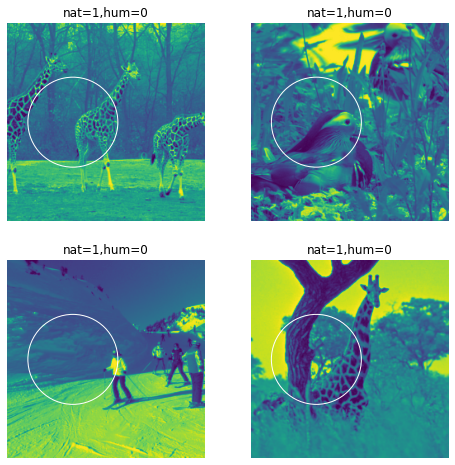

In [12]:
# plot examples - "natural" objects

ims2use = np.where((nat_hum[:,0]==1) & (nat_hum[:,1]==0))[0]

images2plot = np.random.choice(ims2use,4);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(2,2,ii+1);
    plt.imshow(image_data[im,0,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('nat=%d,hum=%d'%(nat_hum[im,0], nat_hum[im,1]))
    print('\nimage %d has:'%ii)
    print([cat_names[cc] for cc in range(len(cat_names)) if cat_labels[im,cc]==1])
    print([stuff_cat_names[cc] for cc in range(len(stuff_cat_names)) if stuff_cat_labels[im,cc]==1])


image 0 has:
['vase']
['shelf', 'other']

image 1 has:
['bottle']
['metal', 'towel', 'wall-tile', 'other']

image 2 has:
['bench']
['other']

image 3 has:
['pizza', 'dining table']
['other']


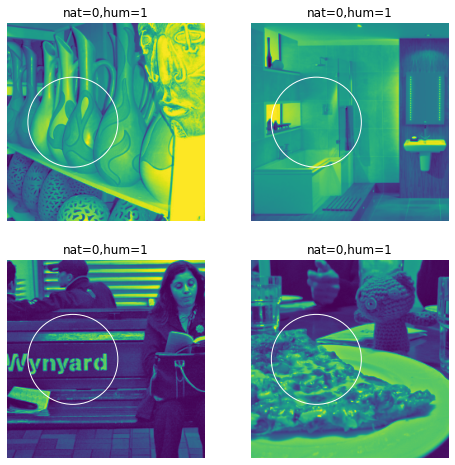

In [13]:
# plot examples - "human-made" objects

ims2use = np.where((nat_hum[:,0]==0) & (nat_hum[:,1]==1))[0]

images2plot = np.random.choice(ims2use,4);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(2,2,ii+1);
    plt.imshow(image_data[im,0,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('nat=%d,hum=%d'%(nat_hum[im,0], nat_hum[im,1]))
    print('\nimage %d has:'%ii)
    print([cat_names[cc] for cc in range(len(cat_names)) if cat_labels[im,cc]==1])
    print([stuff_cat_names[cc] for cc in range(len(stuff_cat_names)) if stuff_cat_labels[im,cc]==1])


image 0 has:
['person', 'horse', 'handbag']
['fence', 'plant-other', 'tree', 'other']

image 1 has:
['person', 'baseball bat']
['dirt', 'playingfield', 'wall-other', 'other']

image 2 has:
['person']
['building-other', 'fog', 'snow', 'wall-concrete', 'other']

image 3 has:
['train', 'clock']
['building-other', 'clouds', 'gravel', 'railroad', 'structural-other', 'tree', 'other']


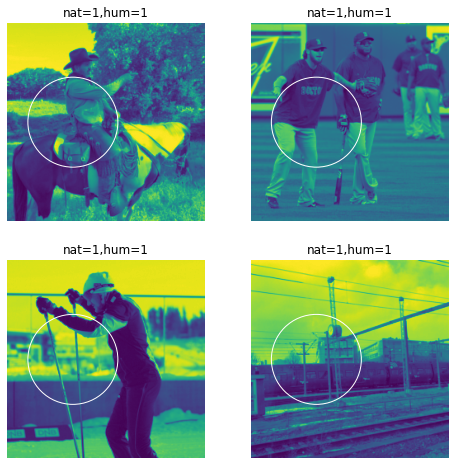

In [14]:
# plot examples - "ambiguous" objects

ims2use = np.where((nat_hum[:,0]==1) & (nat_hum[:,1]==1))[0]

images2plot = np.random.choice(ims2use,4);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(2,2,ii+1);
    plt.imshow(image_data[im,0,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('nat=%d,hum=%d'%(nat_hum[im,0], nat_hum[im,1]))
    print('\nimage %d has:'%ii)
    print([cat_names[cc] for cc in range(len(cat_names)) if cat_labels[im,cc]==1])
    print([stuff_cat_names[cc] for cc in range(len(stuff_cat_names)) if stuff_cat_labels[im,cc]==1])